### Complete Case Analysis ###
- Completer-Case Anslysis(CCA), also called "list-wise deletion" of cases, consists in discarding observations where values in any of the variables are missing.

 - CCA means literally analyzing anly those observations for which there is information in all of the variables in the dataset.

### Assumption For CCA ###
 Missing completely at random: Data is missing at random position
 
       

### Advantage/Disadvantage
**Advantage**
1. Easy to implement as no data manipulation required
2. preserves variable distribution( if data is MCAR), then the distribution of the variables of the reduced dataset should match the distribution in the original dataset

**Disadvantage**
1. It can exclude a large fraction of the original dataset( if missing data is abundent)
2. Excluded observations could be informative for the analysyis (if data is missing at random)
3. When using our models in production, the model will not know how to handle missing data

### When to use CCA? ###
1. MCAR
2. Missing data below 5%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_science_job.csv')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
df.shape

(19158, 13)

In [10]:
cols = [var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean() >0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14220,0.926,Full time course,High School,10.0,74.0
2309,0.624,no_enrollment,Masters,4.0,57.0
33,0.920,no_enrollment,Graduate,20.0,82.0
9844,0.624,Full time course,Graduate,6.0,21.0
6193,0.923,no_enrollment,Graduate,16.0,104.0


In [13]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [17]:
new_df = df[cols].dropna()
df.shape, new_df.shape


((19158, 13), (17182, 5))

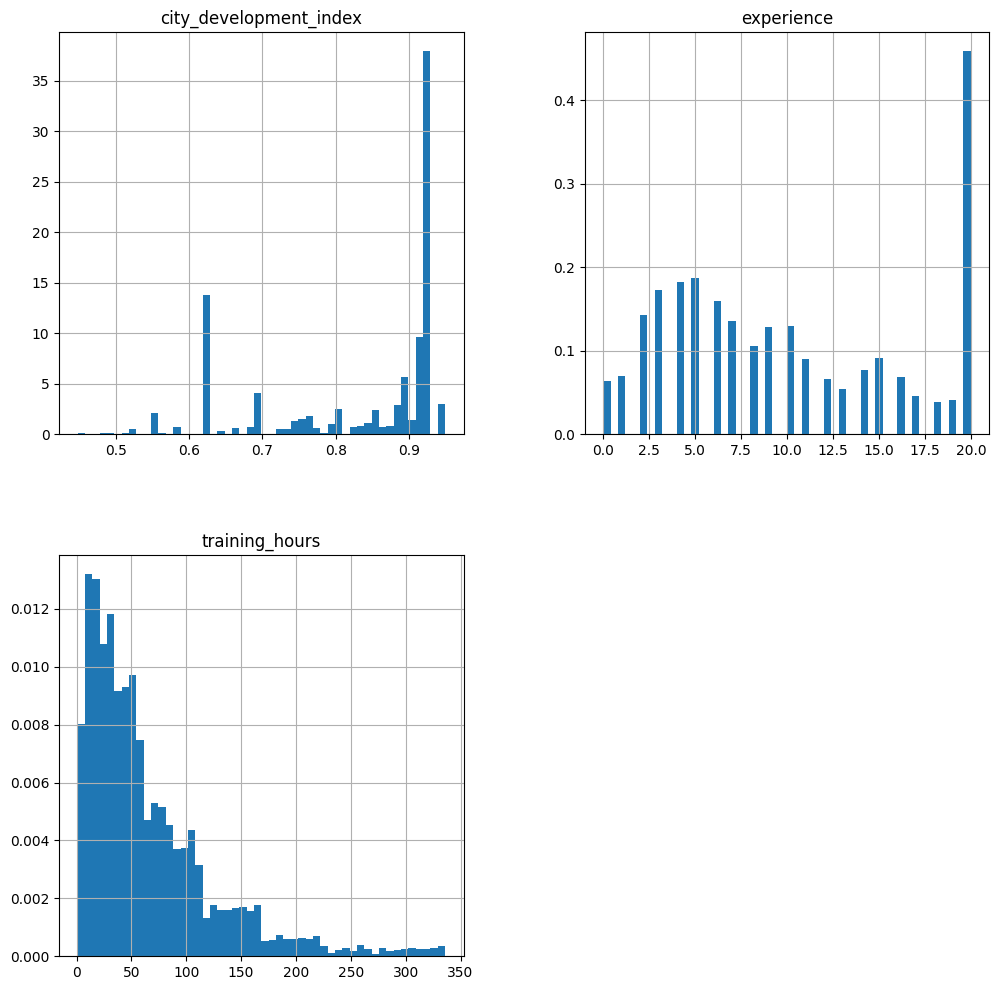

In [18]:
new_df.hist(bins= 50, density = True, figsize=(12,12))
plt.show()

<Axes: >

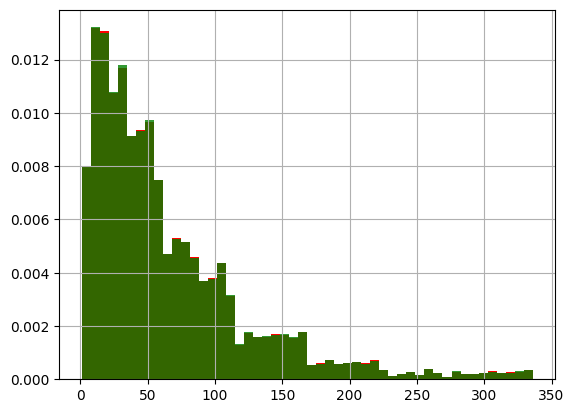

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['training_hours'].hist(bins = 50, ax = ax, density = True, color = 'red')

new_df['training_hours'].hist(bins=50, ax= ax, color= 'green', density=True, alpha = 0.8)

<Axes: ylabel='Density'>

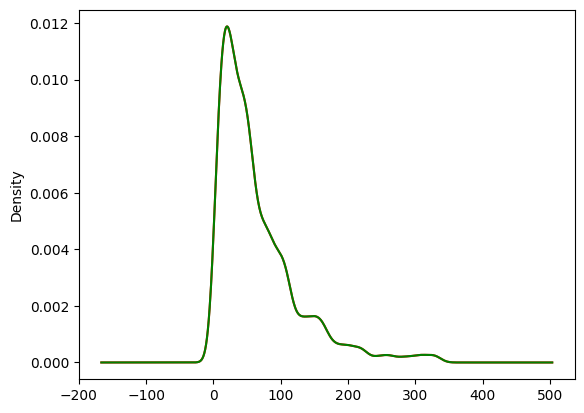

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
# before CCA
df['training_hours'].plot.density( color = 'red')
# after CCA
df['training_hours'].plot.density( color = 'green')

<Axes: >

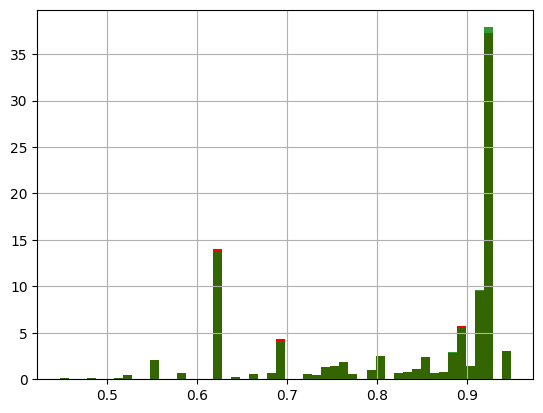

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['city_development_index'].hist(bins = 50, ax = ax, density = True, color = 'red')

new_df['city_development_index'].hist(bins=50, ax= ax, color= 'green', density=True, alpha = 0.8)

<Axes: ylabel='Density'>

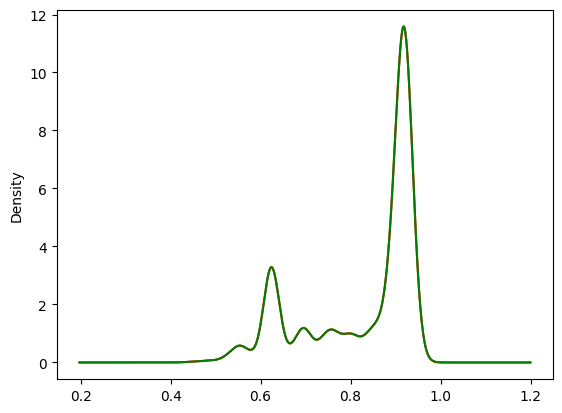

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
# before CCA
df['city_development_index'].plot.density( color = 'red')
# after CCA
df['city_development_index'].plot.density( color = 'green')

<Axes: ylabel='Density'>

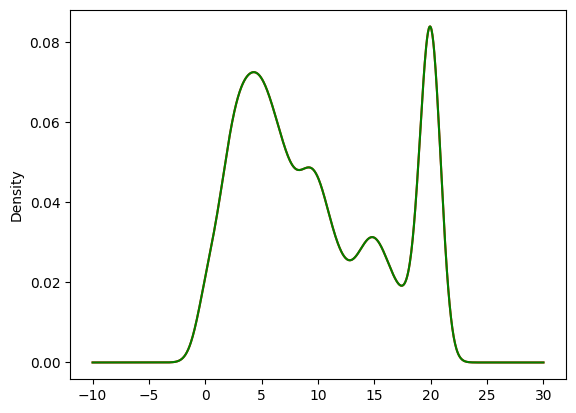

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
# before CCA
df['experience'].plot.density( color = 'red')
# after CCA
df['experience'].plot.density( color = 'green')

#### Handling Categorical data

In [26]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),
    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [28]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts()/len(df),
    # percentage of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original', 'cca']
temp


,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
